# Đồ Án Môn Khai Thác Dữ Liệu:
# **Thực Hiện : Phạm Tiến Sỹ</br>**</br>
# *Giáo Viên Hướng Dẫn : Nguyễn Hồ Duy Trí*

## import thư viện:

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 57 kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
import plotly.graph_objs as go
import sklearn.metrics as metrics


import plotly.graph_objs as go
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

## Đọc File dataset

In [ ]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Xem thông tin data và tiến hành tiền xử lí dữ liệu:

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

kiểm tra các giá trị null trong dữ liệu:


In [ ]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


### Sau khi liệt kê các giá trị null trong data ta tiến hành điền các giá trị rỗng = 0.

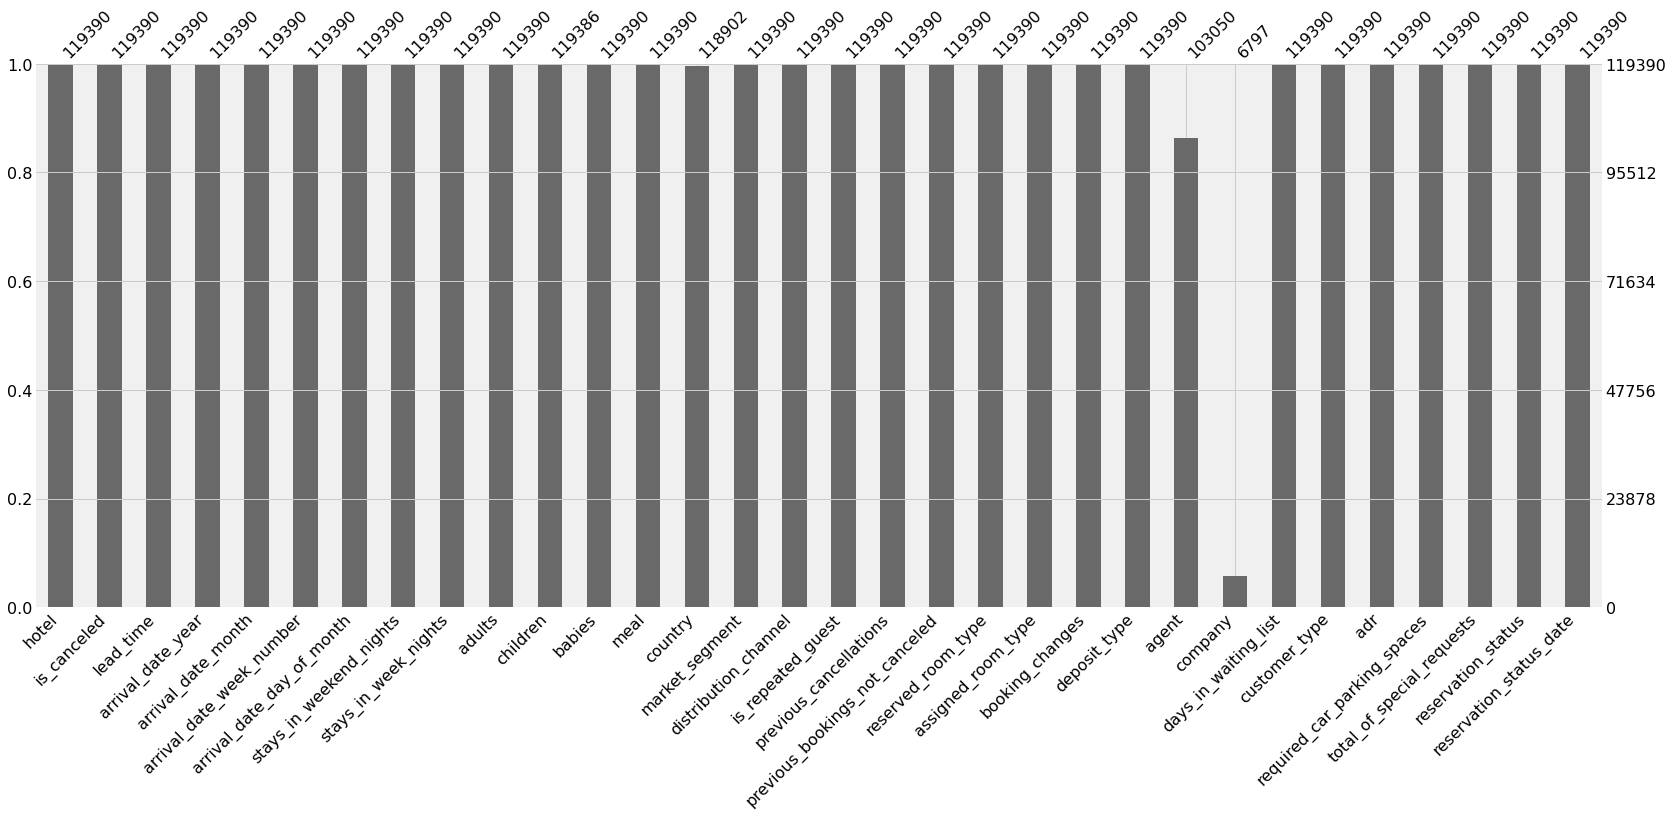

In [ ]:
msno.bar(df)


In [ ]:
df.fillna(0, inplace = True)

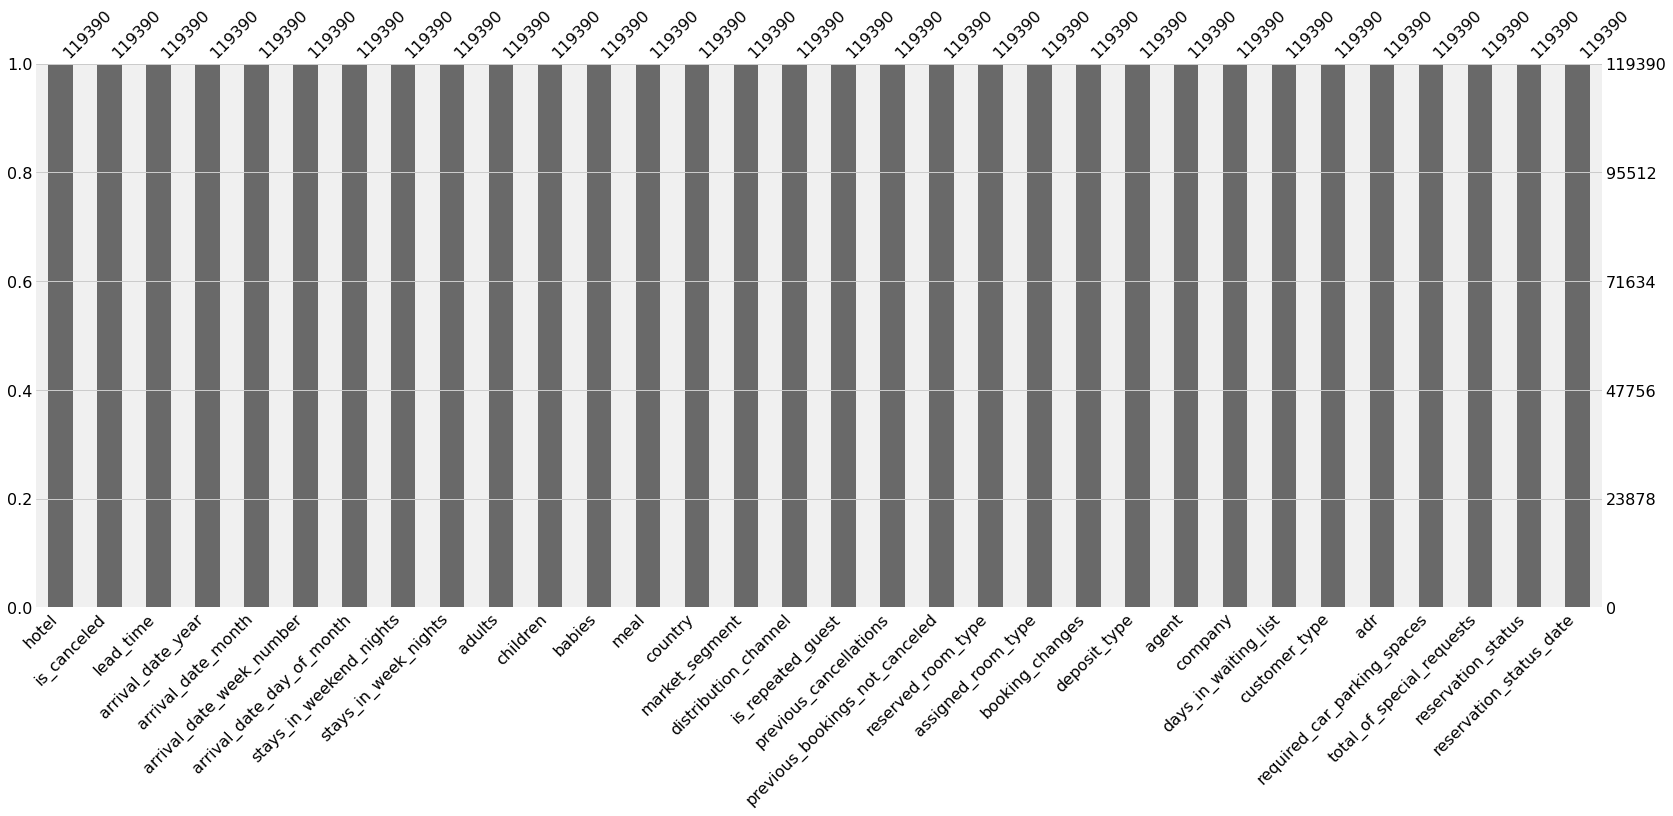

In [ ]:
msno.bar(df)

hiển thị ra các giá trị null

Ta thấy trong dữ liệu có cột dữ liệu người lớn(adults) và cột dữ liệu trẻ em(children)
và 2 cột này không thể đồng thời bằng 0 nên ta loại đi những dòng dữ liệu có cả 2 giá trị này đều bằng 0. 






In [ ]:
#liệt kê ra 
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


xoá bỏ.

In [ ]:
df = df[~filter]
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Tiến hành phân tích dữ liệu


### Khách đến từ đâu là nhiều nhất:


In [ ]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'num of guests']
country_wise_guests

,country,num of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,DMA,1
162,ZMB,1
163,FRO,1
164,TJK,1


In [ ]:
#hình ảnh hoá dữ liệu:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['num of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

=> Từ bảng liệt kê và biểu đồ phân bố khách thì ta thấy hầu hết khách đến từ Bồ Đào Nha và một số nước khác như Vương Quốc Anh, Pháp....

[truy vẫn mã quố gia ở đây](https://bankervn.com/ten-quoc-gia-tieng-anh/)

### Phân tích giá của phòng ở cho một đêm:

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Cả hai khách sạn đều có các loại phòng khác nhau và cách sắp xếp bữa ăn khác nhau, yếu tố mùa cũng rất quan trọng nên dẫn đến giá cả cũng khác nhau rất nhiều.

In [ ]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

Hình cho thấy giá trung bình cho mỗi phòng phụ thuộc vào loại của nó và độ lệch chuẩn.

### Giá mỗi đêm thay đổi như thế nào qua các năm?

In [ ]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [ ]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=bdec45422b43c010b50519c0e63e957ea2c6aeeb0837e2ba56b62d0ea45dae39
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=166bd51a9f7d93f6d6a842da571fa79ad63a9abeeb75e9aeeb81f251ca4762e2
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=final_prices["month"], y=final_prices["price_for_resort"], name="price_for_resort",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=final_prices["month"], y=final_prices["price_for_city_hotel"], name="price_for_city_hotel",
                    line_shape='linear'))
fig.update_layout(title='Giá phòng qua các tháng', template = 'plotly_dark')

=> Biểu đồ này cho thấy rõ ràng rằng giá ở Resort Hotel cao hơn nhiều vào mùa hè và giá của City Hotel thay đổi ít hơn và đắt nhất vào mùa Xuân và Thu.

### Những tháng nào có nhiều khách đến khách sạn nhất.

In [ ]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','num of guests']
resort_guests

,month,num of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','num of guests']
city_guests

,month,num of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [ ]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','num of guests in resort','num of guest in city hotel']
final_guests

,month,num of guests in resort,num of guest in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
final_guests = sort_month(final_guests,'month')
final_guests

,month,num of guests in resort,num of guest in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [ ]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=final_guests["month"], y=final_guests["num of guests in resort"], name="num of guests in resort",
                    line_shape='linear'))
fig2.add_trace(go.Scatter(x=final_guests["month"], y=final_guests["num of guest in city hotel"], name="num of guest in city hotel",
                    line_shape='linear'))
fig2.update_layout(title='Khách thuê phòng qua các tháng', template = 'plotly_dark')

=> Ở City Hotel có nhiều khách vào mùa xuân và mùa thu ngay cả khi giá cả cũng cao nhất, vào tháng 7 và tháng 8 thì ít khách hơn, mặc dù giá có thấp hơn
</br>
=> Số lượng khách của Resort Hotel giảm nhẹ ở tháng 6 vag tháng 9, cũng là lúc giá cao nhất.
</br>
=> Cả hai khách sạn đều có ít khách nhất trong mùa đông.

### Khách thường ở khách sạn trong bao lâu?

In [ ]:
filter = df['is_canceled'] == 0
data = df[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [ ]:
px.bar(stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',template = 'plotly_dark')

=> Từ biển đồ trên ta nhận thấy rằng khách ở 2 khách sạn thường ở lại khách sạn trong 1 4 ngày có tỉ lệ là nhiều nhất.

## Tiến hành xử lí dữ liệu

khảo sát độ tương đồng giữa các cột với nhau.

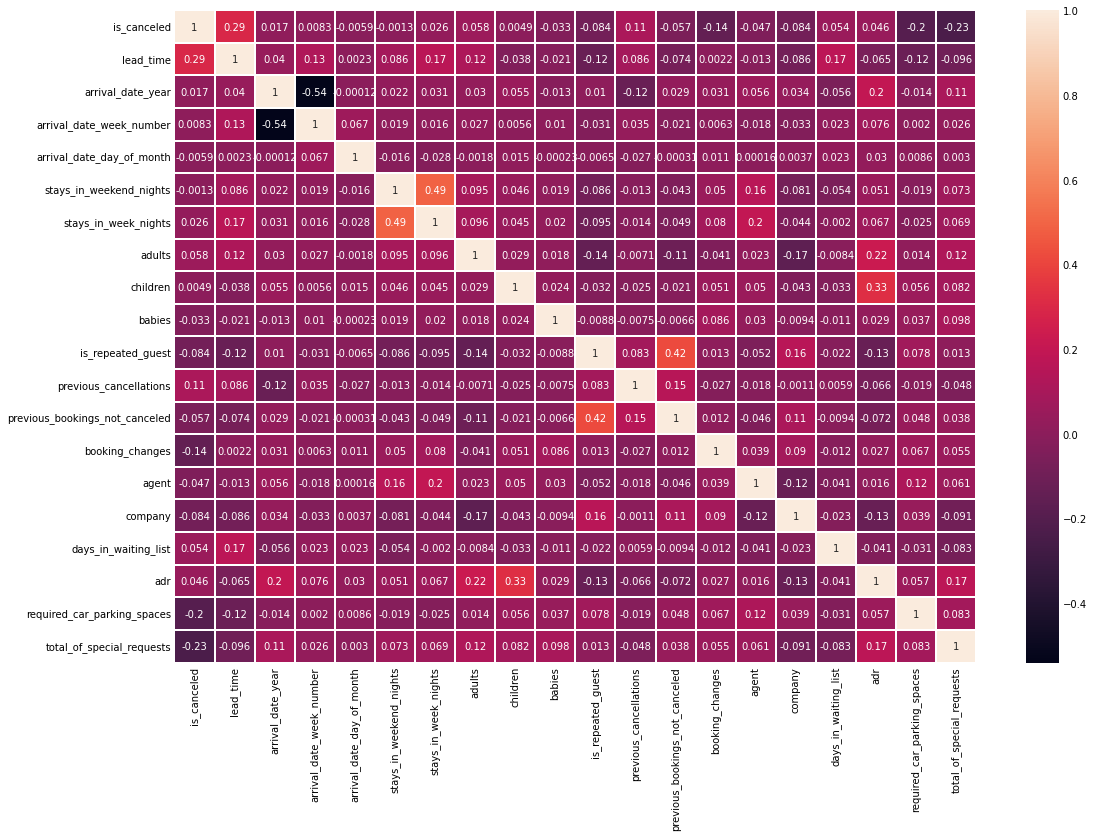

In [ ]:
plt.figure(figsize = (16, 12))
corr = df.corr(method='pearson')
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()


In [ ]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

từ kết quả phân tích ở trên ta tiến hành xoá các cột không hữu ích trong dữ liệu.

In [ ]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [ ]:
#df
records = df[df['is_canceled'] == 1]
records
# for i in records:
#   print(i)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
8,Resort Hotel,1,85,July,27,1,0,3,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,0.0,Transient,82.0,0,1,2015-05-06
9,Resort Hotel,1,75,July,27,1,0,3,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,D,No Deposit,15.0,0.0,Transient,105.5,0,0,2015-04-22
10,Resort Hotel,1,23,July,27,1,0,4,2,0.0,0,BB,Online TA,TA/TO,0,0,0,E,No Deposit,240.0,0.0,Transient,123.0,0,0,2015-06-23
27,Resort Hotel,1,60,July,27,1,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,E,No Deposit,240.0,0.0,Transient,107.0,0,2,2015-05-11
32,Resort Hotel,1,96,July,27,1,2,8,2,0.0,0,BB,Direct,Direct,0,0,0,E,No Deposit,0.0,0.0,Transient,108.3,0,2,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108829,City Hotel,1,25,May,18,6,2,1,1,0.0,0,BB,Corporate,Corporate,1,0,1,E,No Deposit,0.0,450.0,Transient,125.0,0,0,2017-05-06
111355,City Hotel,1,4,June,23,5,1,0,1,0.0,0,BB,Corporate,Corporate,1,0,4,A,No Deposit,0.0,238.0,Transient,65.0,0,0,2017-06-05
111924,City Hotel,1,7,May,22,31,0,1,1,0.0,0,BB,Corporate,Corporate,1,0,1,A,No Deposit,0.0,238.0,Transient,65.0,0,0,2017-05-31
111925,City Hotel,1,6,July,29,17,1,0,1,0.0,0,BB,Corporate,Corporate,1,1,1,A,No Deposit,0.0,238.0,Transient,65.0,0,0,2017-07-17


Xử lí những dòng dữ liệu không có số để tạo khung dữ liệu số và phân loại.

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [ ]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


xuất các giá trị duy nhất của mỗi cột

In [ ]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



mã hoá các biến phân loại


In [ ]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [ ]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [ ]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

Chuẩn hoá các biến số 

In [ ]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [ ]:
num_df.var()

lead_time                         2.582757
arrival_date_week_number          0.440884
arrival_date_day_of_month         0.506325
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
agent                             3.535793
company                           1.346883
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
dtype: float64

In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1


In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [ ]:
df.to_csv('dl.csv')
df

In [ ]:
X.shape, y.shape

((119210, 26), (119210,))

lấy 100 dòng dữ liệu ra để test thử 

In [ ]:
# lấy random 100 dòng bên X
x_backup = X
y_backup = y
validate_x = X.sample(n=100);
array_index = validate_x.index.to_list()

#tiến hành chạy for để xoá các dòng đã lấy radom và sau đó lấy dòng với index tương ứng bên y:
array_y = []
for i in array_index:
  X = X.drop(index=i)
  array_y.append(y.loc[i])
  y = y.drop(index= i)
validate_y = pd.DataFrame(array_y)

In [ ]:
validate_x.shape

(100, 26)

In [ ]:
validate_y.shape

(100, 1)

In [ ]:
X.shape, y.shape

((119110, 26), (119110,))

Tiến hành chia dữ liệu thành 2 tập Train và Test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_train.head()


,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
29951,0,0,2,2,1,0,0,2,11,10,0.693147,3.850148,2.302585,0,1,2,0.0,0,0,0,0,5.484797,0.0,3.761200,0,1
54962,1,0,2,2,8,0,0,2,8,4,5.416100,3.496508,0.693147,1,2,2,0.0,0,0,0,0,2.302585,0.0,4.473123,0,1
69809,1,0,3,2,1,3,0,3,1,24,4.905275,3.178054,2.079442,0,2,2,0.0,0,0,0,0,3.044522,0.0,4.709530,0,0
7896,0,0,2,2,4,0,0,2,2,23,5.846439,3.610918,0.693147,2,7,2,0.0,2,0,0,0,5.484797,0.0,4.983607,0,1
11064,0,0,2,2,2,0,0,3,1,27,4.653960,2.833213,2.833213,2,5,2,0.0,0,0,0,0,5.484797,0.0,4.330733,0,1


In [ ]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
38830,0,2,0,0,5,0,0,3,7,31,5.262690,3.401197,3.135494,3,6,2,0.0,0,0,0,0,5.525453,0.0,5.431974,1,2
51522,1,0,2,2,1,0,0,2,5,23,5.123964,3.091042,3.044522,1,2,2,0.0,0,0,0,0,2.197225,0.0,4.793308,0,1
87787,1,0,3,2,8,0,2,2,4,26,3.806662,2.890372,3.178054,2,1,2,0.0,0,0,0,0,3.218876,0.0,4.564348,0,0
92071,1,0,0,0,1,0,0,2,6,30,4.356709,3.332205,3.295837,2,2,2,0.0,0,0,0,0,2.708050,0.0,4.731803,1,0
24507,0,0,1,1,2,0,2,2,5,24,1.098612,3.135494,3.178054,1,0,2,0.0,0,0,0,0,4.709530,0.0,4.454347,0,2


In [ ]:
y_train.head(), y_test.head()

(29951    0
 54962    0
 69809    1
 7896     1
 11064    1
 Name: is_canceled, dtype: int64, 38830    0
 51522    0
 87787    0
 92071    0
 24507    0
 Name: is_canceled, dtype: int64)

## Xây dựng mô hình.

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8089441132846389
Confusion Matrix : 
[[21160  1281]
 [ 5546  7746]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     22441
           1       0.86      0.58      0.69     13292

    accuracy                           0.81     35733
   macro avg       0.83      0.76      0.78     35733
weighted avg       0.82      0.81      0.80     35733



Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.8089441132846389')

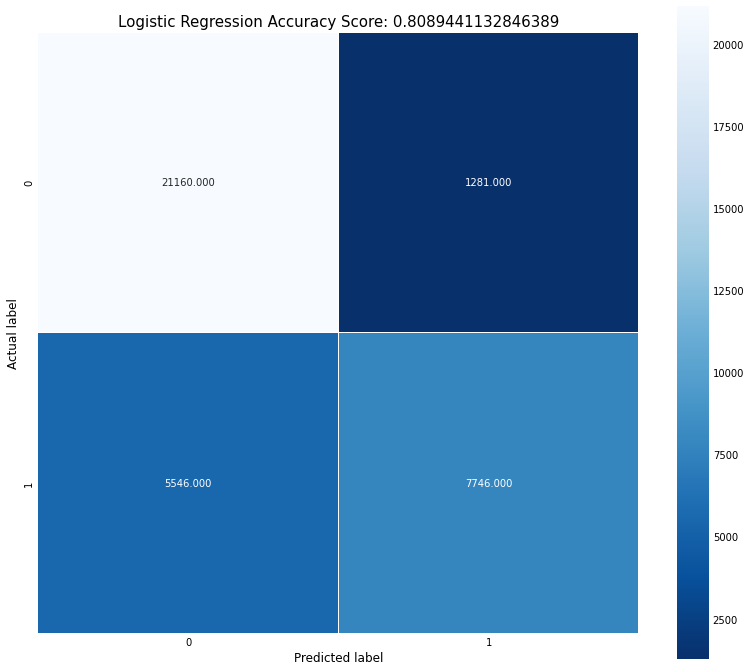

In [ ]:
#tính toán ma trận nhầm lẫn
lr_cm = metrics.confusion_matrix(y_test,y_pred_lr)

#biểu diễn trên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(lr_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Logistic Regression Accuracy Score: {0}'.format(acc_lr)
plt.title(title,size= 15)


### KNN

In [ ]:
# training_acc = []
# test_acc = []
# n_loop = range(1,11)
# for i in n_loop:
#   knn = KNeighborsClassifier(n_neighbors=i,p=2)
#   knn.fit(X_train, y_train)
#   training_acc.append(knn.score(X_train, y_train))
#   test_acc.append(knn.score(X_test, y_test))
#   # y_pred_knn = knn.predict(X_test)
#   # acc_knn = accuracy_score(y_test, y_pred_knn)
#   # conf = confusion_matrix(y_test, y_pred_knn)
#   # clf_report = classification_report(y_test, y_pred_knn)

# plt.plot(n_loop, training_acc,label="train")
# plt.plot(n_loop, test_acc, label = 'test')
# plt.ylabel("accuracy")
# plt.xlabel('n_loop')
# plt.legend()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8924803403016819
Confusion Matrix : 
[[21674   767]
 [ 3075 10217]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     22441
           1       0.93      0.77      0.84     13292

    accuracy                           0.89     35733
   macro avg       0.90      0.87      0.88     35733
weighted avg       0.90      0.89      0.89     35733



Text(0.5, 1.0, 'KNN Accuracy Score: 0.8924803403016819')

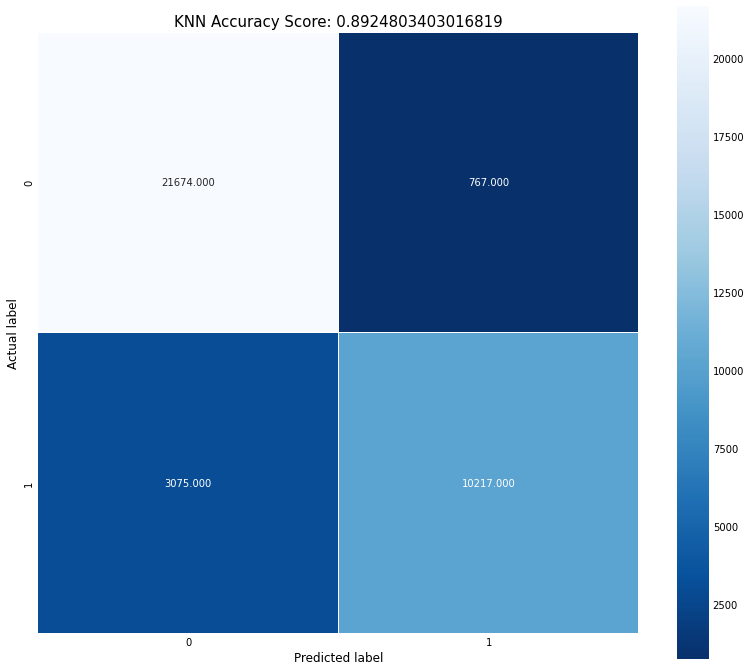

In [ ]:
#tính toán ma trận nhầm lẫn
knn_cm = metrics.confusion_matrix(y_test,y_pred_knn)

#biểu diễn trên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(knn_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'KNN Accuracy Score: {0}'.format(acc_knn)
plt.title(title,size= 15)


### Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9580499818095318
Confusion Matrix : 
[[21770   671]
 [  828 12464]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     22441
           1       0.95      0.94      0.94     13292

    accuracy                           0.96     35733
   macro avg       0.96      0.95      0.95     35733
weighted avg       0.96      0.96      0.96     35733



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.9580499818095318')

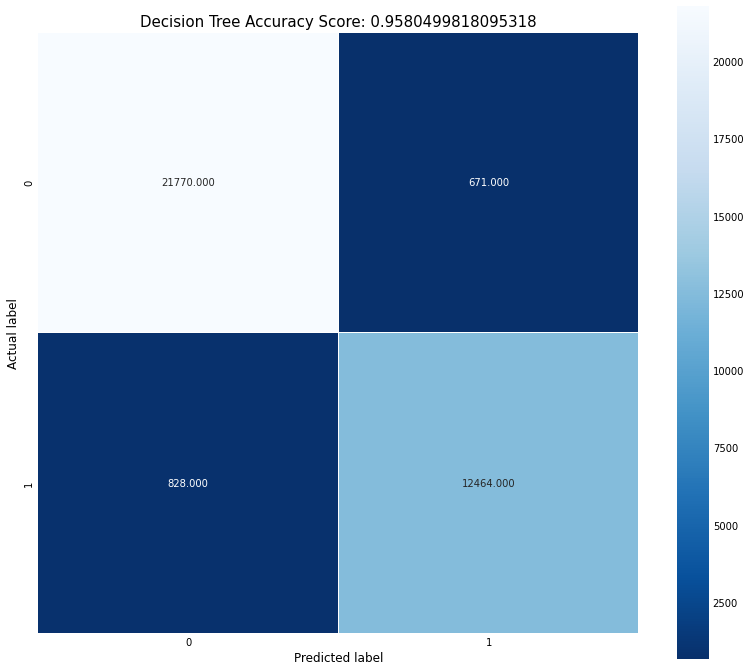

In [ ]:
#tính toán ma trận nhầm lẫn
dtc_cm = metrics.confusion_matrix(y_test,y_pred_dtc)

#biểu diễn trên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(dtc_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(acc_dtc)
plt.title(title,size= 15)


In [ ]:
# from sklearn import tree
# fig, ax = plt.subplots(figsize=(50,30))
# tree.plot_tree(dtc,filled = True,fontsize = 10)
# plt.savefig('decision_tree',dpi = 200)
# plt.show()

### Random Forest Classifier

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9529846360507094
Confusion Matrix : 
[[22280   161]
 [ 1519 11773]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22441
           1       0.99      0.89      0.93     13292

    accuracy                           0.95     35733
   macro avg       0.96      0.94      0.95     35733
weighted avg       0.95      0.95      0.95     35733



Text(0.5, 1.0, 'Random Forest Accuracy Score: 0.9529846360507094')

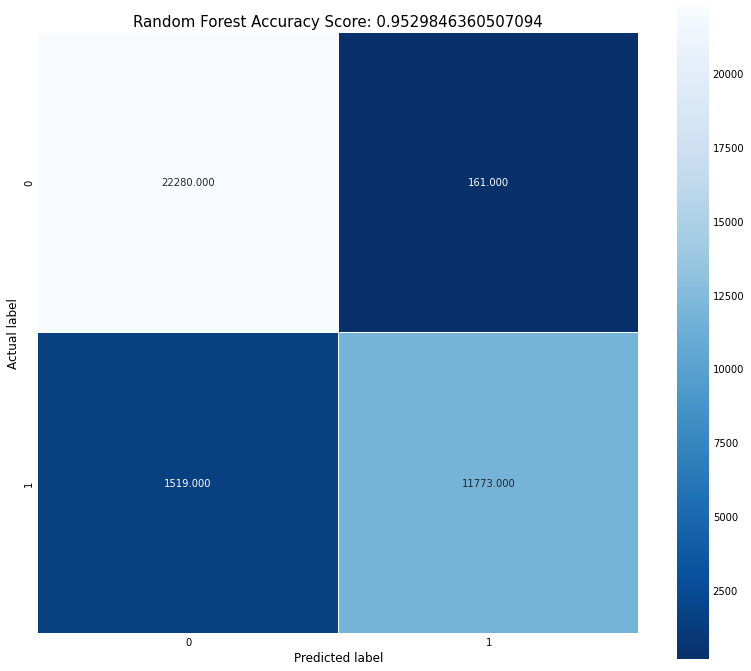

In [ ]:
#tính toán ma trận nhầm lẫn
rd_clf_cm = metrics.confusion_matrix(y_test,y_pred_rd_clf)

#biểu diễn trên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(rd_clf_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Random Forest Accuracy Score: {0}'.format(acc_rd_clf)
plt.title(title,size= 15)


### Cat Boost Classifier [link](https://www.kaggle.com/prashant111/catboost-classifier-in-python)
CatBoost là một thuật toán để tăng độ dốc trên cây quyết định. Nó được phát triển bởi các nhà nghiên cứu và kỹ sư của Yandex, được sử dụng cho hệ thống tìm kiếm, đề xuất, trợ lý cá nhân, xe tự lái, dự đoán thời tiết và nhiều nhiệm vụ khác tại Yandex và các công ty khác, bao gồm CERN, Cloudflare, Careem taxi. Nó ở dạng mã nguồn mở và có thể được sử dụng bởi bất kỳ ai.

In [ ]:
cat = CatBoostClassifier(iterations=300)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.205447
0:	learn: 0.5668156	total: 71.3ms	remaining: 21.3s
1:	learn: 0.4909611	total: 94.1ms	remaining: 14s
2:	learn: 0.4506150	total: 122ms	remaining: 12.1s
3:	learn: 0.4330520	total: 146ms	remaining: 10.8s
4:	learn: 0.4186879	total: 176ms	remaining: 10.4s
5:	learn: 0.3831660	total: 202ms	remaining: 9.92s
6:	learn: 0.3595379	total: 236ms	remaining: 9.87s
7:	learn: 0.3432363	total: 260ms	remaining: 9.5s
8:	learn: 0.3240678	total: 286ms	remaining: 9.25s
9:	learn: 0.3177717	total: 310ms	remaining: 8.98s
10:	learn: 0.3065549	total: 334ms	remaining: 8.78s
11:	learn: 0.2762288	total: 357ms	remaining: 8.57s
12:	learn: 0.2643784	total: 383ms	remaining: 8.45s
13:	learn: 0.2450245	total: 410ms	remaining: 8.38s
14:	learn: 0.2314457	total: 434ms	remaining: 8.24s
15:	learn: 0.2209721	total: 458ms	remaining: 8.13s
16:	learn: 0.2100624	total: 480ms	remaining: 8s
17:	learn: 0.1999204	total: 504ms	remaining: 7.89s
18:	learn: 0.1979731	total: 535ms	remaining: 7.91s
19:	learn: 0.18

In [ ]:
print(f"Accuracy Score of Cat Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Cat Boost Classifier is : 0.9971734810959058
Confusion Matrix : 
[[22430    11]
 [   90 13202]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22441
           1       1.00      0.99      1.00     13292

    accuracy                           1.00     35733
   macro avg       1.00      1.00      1.00     35733
weighted avg       1.00      1.00      1.00     35733



Text(0.5, 1.0, 'Cat Boost Accuracy Score: 0.9971734810959058')

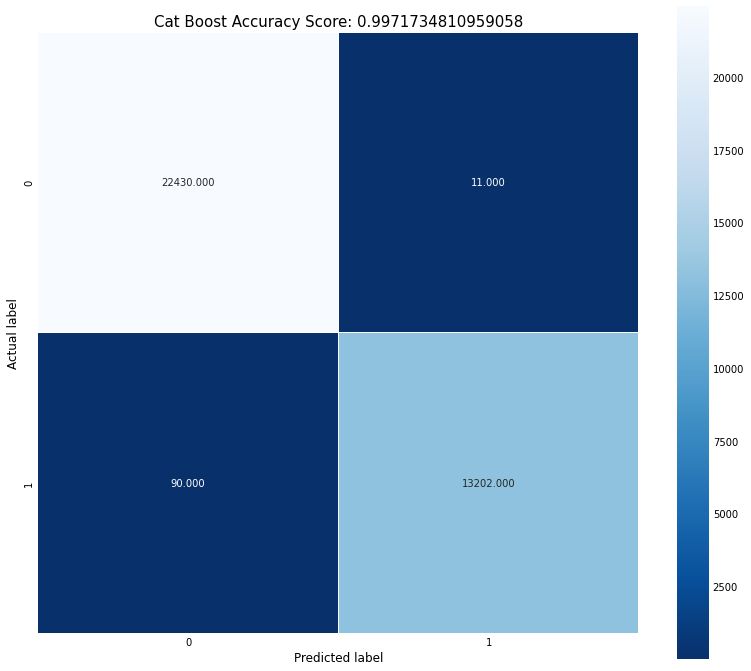

In [ ]:
#tính toán ma trận nhầm lẫn
rd_clf_cm = metrics.confusion_matrix(y_test,y_pred_cat)

#biểu diễn trên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(rd_clf_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Cat Boost Accuracy Score: {0}'.format(acc_cat)
plt.title(title,size= 15)


## So sánh kết quả của các thuật toán chạy được.

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Cat Boost' ],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_cat]
})

models.sort_values(by = 'Score', ascending = False)


,Model,Score
4,Cat Boost,0.997173
2,Decision Tree Classifier,0.958050
3,Random Forest Classifier,0.952985
1,KNN,0.892480
0,Logistic Regression,0.808944


In [ ]:
px.bar(data_frame = models, x = 'Model', y = 'Score', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

## Tiến Hành Chạy Thử Thực Nghiệm

In [ ]:
rs_model = dtc.predict(validate_x)
count = 0;
for i in rs_model:
  rs_real = array_y[count]
  kq = ''
  if i == rs_real:
    kq = "OKE"
  else:
    kq = 'Fail'
  print("Result in Radom Forest : {} Result in dataset : {} => {}".format(i,rs_real,kq))
  count = count + 1;

Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 1 Result in dataset : 1 => OKE
Result in Radom Forest : 0 Result in dataset : 1 => Fail
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 1 Result in dataset : 1 => OKE
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 0 Result in dataset : 0 => OKE
Result in Radom Forest : 1 Result in dataset : 1 => OKE
Result in Radom Forest : 1 Result in dataset : 1 => OKE
Result in Radom Forest : 0 Result in dataset : 

Chạy trên Thuật toán Cat Boosting:

In [ ]:
count = 0;
for i in array_index:
  rs_model = cat.predict(validate_x.loc[i])
  rs_real = array_y[count]
  kq = ''
  if rs_model == rs_real:
    kq = "OKE"
  else:
    kq = 'Fail'
  print("Result in Cat Boost : {} rs : {} => {}".format(rs_model,rs_real,kq))
  count = count + 1;

Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 1 rs : 1 => OKE
Result in Cat Boost : 1 rs : 1 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 1 rs : 1 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 1 rs : 1 => OKE
Result in Cat Boost : 1 rs : 1 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 1 rs : 1 => OKE
Result in Cat Boost : 1 rs : 1 => OKE
Result in Cat Boost : 0 rs : 0 => OKE
Result in Cat Boost : 1 rs : 1 => OKE
Result in Ca